## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min()) / (x.max() - x.min())
    x = x * 2 - 1
    if flatten:
        x = x.reshape((len(x), -1))    
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 256, 128, 128, 64, 64, 64, 32])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidd

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 34s 670us/step - loss: 1.7852 - acc: 0.3621 - val_loss: 1.6099 - val_acc: 0.4325
Epoch 2/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.5294 - acc: 0.4600 - val_loss: 1.4878 - val_acc: 0.4742
Epoch 3/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.4116 - acc: 0.5031 - val_loss: 1.4171 - val_acc: 0.5076
Epoch 4/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.3096 - acc: 0.5414 - val_loss: 1.4064 - val_acc: 0.5083
Epoch 5/100
50000/50000 [==============================] - 10s 207us/step - loss: 1.2281 - acc: 0.5691 - val_loss: 1.3758 - val_acc: 0.5227
Epoch 6/100
50000/50000 [==============================] - 10s 209us/step - loss: 1.1533 - acc: 0.5927 - val_loss: 1.3582 - val_acc: 0.5278
Epoch 7/100
50000/50000 [==============================] - 10s

Epoch 57/100
50000/50000 [==============================] - 10s 203us/step - loss: 0.0945 - acc: 0.9702 - val_loss: 3.1665 - val_acc: 0.5354
Epoch 58/100
50000/50000 [==============================] - 10s 202us/step - loss: 0.0985 - acc: 0.9678 - val_loss: 2.9941 - val_acc: 0.5298
Epoch 59/100
50000/50000 [==============================] - 10s 205us/step - loss: 0.0989 - acc: 0.9684 - val_loss: 3.0313 - val_acc: 0.5360
Epoch 60/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.0981 - acc: 0.9686 - val_loss: 3.0362 - val_acc: 0.5300
Epoch 61/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.0969 - acc: 0.9682 - val_loss: 3.0539 - val_acc: 0.5333
Epoch 62/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.0949 - acc: 0.9683 - val_loss: 3.1693 - val_acc: 0.5328
Epoch 63/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.0894 - acc: 0.9716 - val_loss: 3.1128 - val_acc: 0.5333
Epoch 64/100


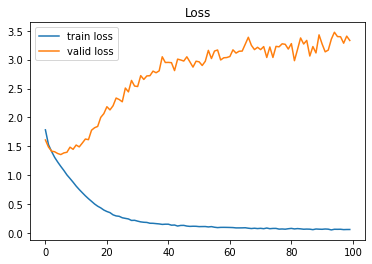

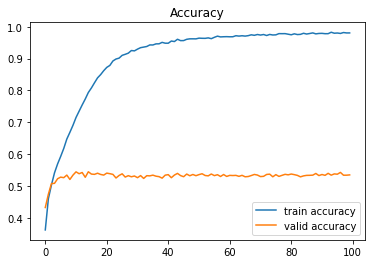

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()